## Building a GPT

Companion notebook to the [Zero To Hero](https://karpathy.ai/zero-to-hero.html) video on GPT.

In [ ]:
# # We always start with a dataset to train on. Let's download the tiny shakespeare dataset
# !wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

In [ ]:
!pip3 install numpy --pre torch --force-reinstall --index-url https://download.pytorch.org/whl/nightly/cu117

Looking in indexes: https://download.pytorch.org/whl/nightly/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 65.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 1.3 MB/s eta 0:00:000:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 23.9 MB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.7/18.7 MB 72.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 96.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 60.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.1
    Uninstalling numpy-1.23.1:
      Successfully

In [ ]:
!ls

backprop.txt   gpt_dev.ipynb  micrograd.txt  story.txt
batchnorm.txt  input.txt      mlp.txt	     wavenet.txt
gpt.txt        makemore.txt   pytorch


In [ ]:
import torch
print(torch.__version__)

2.0.0.dev20230121+cu117


In [ ]:
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()
print(text[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [ ]:
chars = sorted(list(set(text)))
vocab_size = len(chars)

stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i:ch for i, ch in enumerate(chars)}

encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import math

In [ ]:
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == "train" else val_data
    ix = torch.randint(len(data)- block_size, (batch_size,))
    x = torch.stack([data[i: i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

Below this line, I will run the code below again for building another model.
That is because the code above using text. If I load other text file, it will not be text varible.

In [ ]:
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [ ]:
def new_gelu(x):
    """
    Implementation of the GELU activation function currently in Google BERT repo (identical to OpenAI GPT).
    Reference: Gaussian Error Linear Units (GELU) paper: https://arxiv.org/abs/1606.08415
    """
    return 0.5 * x * (1.0 + torch.tanh(math.sqrt(2.0 / math.pi) * (x + 0.044715 * torch.pow(x, 3.0))))

- EX1: The n-dimensional tensor mastery challenge: Combine the `Head` and `MultiHeadAttention` into one class that processes all the heads in parallel, treating the heads as another batch dimension (answer is in nanoGPT).

In [ ]:
torch.zeros((4, 2,8,8)) [0,0]

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
tril1 = torch.tril(torch.ones(8, 8))
tril2 = torch.tril(torch.ones(8, 8)).view(1, 1, 8, 8)
o1 = torch.randn((4, 2, 8, 8))
m1 = o1.masked_fill(tril1 == 0, float('-inf'))
m2 = o1.masked_fill(tril2 == 0, float('-inf'))

In [ ]:
torch.allclose(m1, m2)

True

In [ ]:
# import torch
# conda install pytorch torchvision torchaudio pytorch-cuda=11.6 -c pytorch -c nvidia
# print(torch.__version__)


In [ ]:
class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

        self.qkv = nn.Linear(n_embd, n_embd*3, bias=False)
        
        #building a mask for matrix size of  # (B, T, nh, nh)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))


        self.dropout = nn.Dropout(dropout)
        self.n_head = num_heads
    def forward(self, x):
        B,T,C = x.shape
        q, k, v = self.qkv(x).split(n_embd, dim=2) # (B,T,C*3) to 3 of  (B,T,C)  

        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1,2) #  (B,T, nh, hs)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1,2) #  (B,T, nh, hs)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1,2) #  (B,T, nh, hs)
        
        # (B, T, nh, hs) @ (B, T, hs, nh) -> (B, T, nh, nh)
        wei = q @ k.transpose(-2, -1) * C**-0.5 
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, nh, nh)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        
        out = wei @ v # (B, nh, T, T) x (B, nh, T, hs) -> (B, nh, T, hs)

        out = out.transpose(1, 2).contiguous().view(B, T, C)
            

        out = self.dropout(self.proj(out))
        return out

In [ ]:
class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        #just a comment
        # self.net = nn.Sequential(
        #     nn.Linear(n_embd, 4 * n_embd),
        #     new_gelu,
        #     nn.Linear(4 * n_embd, n_embd),
        #     nn.Dropout(dropout),
        # )
        self.feature_extract = nn.Linear(n_embd, 4 * n_embd)
        self.feature_detract = nn.Linear(4 * n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        x = self.feature_extract(x)
        x = new_gelu(x)
        x = self.feature_detract(x)

        x = self.dropout(x)
        return x

In [ ]:
class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

In [ ]:
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [ ]:
# hyperparameters
batch_size = 64 # how many independent sequences will we process in parallel?
block_size = 256 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 512
n_head = 8
n_layer = 6
dropout = 0.2
# ------------

torch.manual_seed(1337)

In [ ]:
model = None

In [ ]:
print(device)
model = BigramLanguageModel()
model = model.to(device)
# m = torch.compile(mod01)
print(sum(p.numel() for p in model.parameters())/1e6, 'M parameters')

cuda
19.198109 M parameters


In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [ ]:
for iter in range(max_iters):
    if iter % eval_interval == 0 or iter == max_iters -1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    # sample a batch of data
    xb, yb = get_batch('train')
    
    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none = True)
    loss.backward()
    optimizer.step()
    
# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(model.generate(context, max_new_tokens=500)[0].tolist()))

step 0: train loss 4.3315, val loss 4.3307
step 500: train loss 1.5400, val loss 1.7231
step 1000: train loss 1.2676, val loss 1.5193
step 1500: train loss 1.1402, val loss 1.4896
step 2000: train loss 1.0315, val loss 1.5094
step 2500: train loss 0.9176, val loss 1.5621
step 3000: train loss 0.8020, val loss 1.6332
step 3500: train loss 0.6810, val loss 1.7247
step 4000: train loss 0.5660, val loss 1.8492
step 4500: train loss 0.4599, val loss 1.9535
step 4999: train loss 0.3708, val loss 2.0861

How young lamb'd about with a rest wife a shamed breach
For being a many more of good tower two youung;
Which was it in that growth the base do good,
To comfort to give the state, which they conceal the story.

Boy:
But, for I go that our order died delight,
I am concerning by the faith were manh
I am lacker to death mo well and husband,
As felt that I have in justice which I chance.
But fear, so will I.

BUCKINGHAM:
Good danger, no man word till the world with words.

GLOUCESTER:
Clarence to

In [ ]:
print(decode(model.generate(context, max_new_tokens=5000)[0].tolist()))


RICHARD:
Nay, if the help-will orator all himself,
Will close not hold on him. but, let him speak,
Let him calm point. Advery well too.
So, farewell, my well; good aunt.

DUCHESS OF YORK:
I pray thee, good Montague may the compay.

QUEEN ELIZABETH:
Why faith be so, it is the matter, sure so.

RICHARD:
I come, I crack to pardon me, if I cannot learn.

DORSET:
The purple breath of thine own: seal out, now prove awond:
Whats's the best will comfort, to the name that
Which God's good for itself, that have woe
The mighty power ever! O, what very
Minus death have weed them hewish him,
Or her my fance? O, find his kingdom both with speed;
One of the wind which time histoes disparage
Of dignity, a viperod, shed with a signorant
In merciful time: her comes who comes by his
false against herewith children of recreant,
execution was where he is: I may with him well.
The warrant of your fornications afford
And the best fix'd by Angelo in banishment,
Who strives in his light: this house with patie

In [ ]:
# data_x = []
# for i in range(10):
#     for k in range(10):
#         for k in range(10):
#             "".join(str(i), str(j), str(k))

In [ ]:
if 'text' in globals():
    print("yeah")

In [ ]:
list_text = ["story.txt"]

with open(list_text[0], 'r', encoding='utf-8') as f:
    text_all = f.read()

In [ ]:
# hyperparameters
batch_size = 64 # how many independent sequences will we process in parallel?
block_size = 256 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 512
n_head = 8
n_layer = 6
dropout = 0.2
# ------------

torch.manual_seed(1337)

In [ ]:
chars = sorted(list(set(text_all)))
vocab_size = len(chars)

stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i:ch for i, ch in enumerate(chars)}

encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])
vocab_size

157

In [ ]:
print(device)
model = BigramLanguageModel()
model = model.to(device)
# m = torch.compile(mod01)
print(sum(p.numel() for p in model.parameters())/1e6, 'M parameters')

cuda
19.198109 M parameters


In [ ]:
data = torch.tensor(encode(text_all), dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]
print(len(train_data))
print(len(val_data))
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == "train" else val_data
    ix = torch.randint(len(data)- block_size, (batch_size,))
    x = torch.stack([data[i: i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

850142
94461


In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [ ]:
for iter in range(max_iters):
    if iter % eval_interval == 0 or iter == max_iters -1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    # sample a batch of data
    xb, yb = get_batch('train')
    
    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none = True)
    loss.backward()
    optimizer.step()
    
# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(model.generate(context, max_new_tokens=500)[0].tolist()))

step 0: train loss 5.2351, val loss 5.2232
step 500: train loss 1.5566, val loss 1.9454
step 1000: train loss 1.2250, val loss 1.6973
step 1500: train loss 1.0462, val loss 1.6849
step 2000: train loss 0.8900, val loss 1.7581
step 2500: train loss 0.7353, val loss 1.8757
step 3000: train loss 0.5880, val loss 2.0398
step 3500: train loss 0.4559, val loss 2.2587
step 4000: train loss 0.3448, val loss 2.4505
step 4500: train loss 0.2666, val loss 2.5799
step 4999: train loss 0.2096, val loss 2.7382

[FN#241] Entertain gro and necklace cause shall hardly with such talk
favour of him." During then he used to another serve understored and
the Enverthing with drink at the guard and pinioned, the Mount of
Tiberian noblers and the Jinn boiled about doeth for us risk and
escates more unless than the sleep. And she bent a suffice whose Thousand
Nights and when she waxed, "Wilt direct me a crier instruct of stuff
of my poor deeds, rived in a sole or tatrip of force and trusty cast intent thin
thy

In [ ]:
print(decode(model.generate(context, max_new_tokens=2000)[0].tolist()))


[FN#140] for the Porter Mahik of Pleasur. Moslemh = the tribe, for
which Destiny have seen how the infinite frea of hashes ever design.


The rade oddrably as Nubian and is also Subh (a little showed line), and
profusion was to show whose Arabic Mahammed's King King of the Banu who
bade beating me; and the two bitches being graced with their Kings person
and his offixed weeping only a procuratrix as the three hunch took a piece."

As we entreated the bird Nubian [FN#3] in which this world-was) is castled with
soon from which shall net have occasion the save country of the
work from the devire of me. The young man shot himself to come,
on one day he remain such an oath." I translated to him and, take thy son of
thine and even man and thou shalt say! So Allah well ask?—what have bewelcome
of this man and the moon whom hath usurely cur!by Allah he slained him for this
very condition and wot how tasteful; how thou hadst honoured of my men
for thee and what hath befallen thee for thy desir

In [ ]:
!nvidia-smi

Sun Jan 22 04:54:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.73.05    Driver Version: 510.73.05    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A4000    Off  | 00000000:00:05.0 Off |                  Off |
| 66%   81C    P2   103W / 140W |   9155MiB / 16376MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

- EX3: Find a dataset that is very large, so large that you can't see a gap between train and val loss. Pretrain the transformer on this data, then initialize with that model and finetune it on tiny shakespeare with a smaller number of steps and lower learning rate. Can you obtain a lower validation loss by the use of pretraining?


For this, I am going to use the model in above that just trained on "One Thousand and One Nights" to use it as a pretraining to train the Shakespeare dataset.

For this part, I am guessing it is asking me to do Transformer Learning.


For EX3, it asked us to train on the larger dataset and train the Shakespeare after, this
is a transfer learning. If so, we need to freeze the trained weight and remove the head. 

In [ ]:
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()
print(text[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [ ]:
chars = sorted(list(set(text)))
vocab_size = len(chars)

stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i:ch for i, ch in enumerate(chars)}

encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])

In [ ]:
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == "train" else val_data
    ix = torch.randint(len(data)- block_size, (batch_size,))
    x = torch.stack([data[i: i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

Save the model for safety reason.

In [ ]:
# torch.save(model.state_dict(), 'oton1.pt')

In [ ]:
# torch.save(model.state_dict(), 'init_pre1.pt')
model.lm_head = nn.Linear(n_embd, 157)
model.load_state_dict(torch.load('oton1.pt'))
model.lm_head = nn.Linear(n_embd, vocab_size)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [ ]:
vocab_size

65

In [ ]:
lre = torch.linspace(-5, -1, 500)
lrs = 10**lre


lri = []
lossi = []
stepi = []
lrs[:10]

tensor([1.0000e-05, 1.0186e-05, 1.0376e-05, 1.0569e-05, 1.0766e-05, 1.0967e-05,
        1.1171e-05, 1.1379e-05, 1.1591e-05, 1.1807e-05])

In [ ]:
model = model.to(device)
# m = torch.compile(mod01)
print(sum(p.numel() for p in model.parameters())/1e6, 'M parameters')


19.150913 M parameters


In [ ]:
for iter in range(500):
    if iter % eval_interval == 0 or iter == max_iters -1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    # sample a batch of data
    xb, yb = get_batch('train')
    
    # evaluate the loss
    logits, loss = model(xb, yb)
    
    lr = lrs[iter]
    for g in optimizer.param_groups:
        g['lr'] = lr
    optimizer.zero_grad(set_to_none = True)
    loss.backward()
    optimizer.step()
    
    lri.append(lre[iter])
    stepi.append(iter)
    lossi.append(loss.log10().item())


step 0: train loss 4.2822, val loss 4.2927


In [ ]:
import matplotlib.pyplot as plt

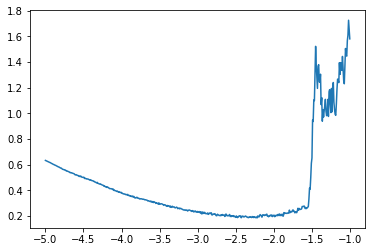

In [ ]:
plt.plot(lri, lossi)

In [ ]:
model.lm_head = nn.Linear(n_embd, 157)
model.load_state_dict(torch.load('oton1.pt'))
model.lm_head = nn.Linear(n_embd, vocab_size)
model = model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

In [ ]:
for iter in range(max_iters):
    if iter % eval_interval == 0 or iter == max_iters -1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    # sample a batch of data
    xb, yb = get_batch('train')
    
    # evaluate the loss
    logits, loss = model(xb, yb)
    
    if(iter == 1000):
        for g in optimizer.param_groups:
            g['lr'] = 8e-5
    
    optimizer.zero_grad(set_to_none = True)
    loss.backward()
    optimizer.step()
    
# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(model.generate(context, max_new_tokens=500)[0].tolist()))

step 0: train loss 4.4042, val loss 4.4045
step 500: train loss 1.2204, val loss 1.5078
step 1000: train loss 1.0597, val loss 1.5050
step 1500: train loss 0.9807, val loss 1.4968
step 2000: train loss 0.9441, val loss 1.5107
step 2500: train loss 0.9149, val loss 1.5319
step 3000: train loss 0.8847, val loss 1.5432
step 3500: train loss 0.8565, val loss 1.5605
step 4000: train loss 0.8292, val loss 1.5735
step 4500: train loss 0.8036, val loss 1.6006
step 4999: train loss 0.7768, val loss 1.6116

Forberth, mocking that they say true Rutland's true of tears,
Witness many story be hereafter:
Therefore they are all they that stand quick links:
Yield they of the midst chequeme gravity Rome
at least. My name is Banelingbroke?

Nay, fetch!

Nurse:
Will you shall he know how the Troy and respect?
Uncle, foolish to Mantua: the people hither life
Before those high and have writ. Prithee, think not the
strict stumble-proof. I honourably minca's bosom,
save a very relering and honour'd. Thou lie

In [ ]:
print(decode(model.generate(context, max_new_tokens=5000)[0].tolist()))


Instigatingale.

LEONTES:
Ay, there's a lessernness,
That I will return before a footment's eyeborn,
Good fortune Hereford, and far stick his armour,
And laugh upon bands and good loving souls;
On pity of death-bloody, Warwick, let's hell.

LORD ROSS:
Pheris, Vaughan, she might be the crow'd in part.

QUEEN MARGARET:
Lord Edward, cohse that me were from our brothers?

KING RICHARD III:
Ay the king of fresh Dion, and this fault that give.
My partuous sons, God, keep the hold of majesty,
The king the Duke of Norfolk life, but kiss
Time enmity: we shall go call King Henry's grows
Aiming Lewis of hers, for the best. Wife, nobless and tremble,
Even the infectiven thousand Guilus,
Kind newly did behind; and 'twere the gentleman
When the mapest way, they are further;
Enship to come the cares, Clarence cannot
Leave in my antitude to resign fear.
But I tell you,--for this sight before it haze
The true house of my pancient reply,
Without you book of your hands: it is not,
To make but one noish 

In [ ]:
# torch.save(model.state_dict(), 'final_result.pt')

In [ ]:
print(decode(model.generate(context, max_new_tokens=7000)[0].tolist()))



Grame:
Yet stands to abistre: but thou hast, sure thy land stir
it will fly too: find thy songs of thy face,
And fall batterwise budted toutment;
Srean thou, thy wife and thyself in thy bed;
Death, dog, mispate, and yet mull all tongue,
MEARDANE:
Be Earl of Warwick, I would yet have my comfort.
But what loss what title?  noble Mars!
The say is King of coming spectacle
Enjust the waves. Where have we now the wars
My mercy wrong to be cut of his own child,
Servant Clarence and for Duke of York,
Northame this dukes is changed royal by
The noble incle Richmond of the Lord Hastings.
To-morrow all to hear him to take his bed:
Advice cousin, wisdom from our foes!

KING RICHARD II:
Norfolk, thou hade out no further love,
Shalt post in bereft us prison: equest, given,
Doing what end our choppier to any power
Than keep, to keep a back'd for holding:
But since thou canst not break no farther stop,
Tell Richard, sound a calls and love-sleepy,
That thou stand'st thus music and stold, their
beggar

In [ ]:
# torch.save(model.state_dict(), 'init_pre1.pt')
model.lm_head = nn.Linear(n_embd, 65)
# vocab_size = 157
model.load_state_dict(torch.load('final_result.pt'))
# model.lm_head = nn.Linear(n_embd, vocab_size)
# optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
# model = model.to(device)

<All keys matched successfully>

In [ ]:
list_text = ["story.txt"]

with open("input.txt", 'r', encoding='utf-8') as f:
    text_all = f.read()
chars = sorted(list(set(text_all)))
vocab_size = len(chars)

stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i:ch for i, ch in enumerate(chars)}

encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])
vocab_size

65

In [ ]:
question1 = "Apple: tree\nGreen: yes\nJump: down\n\nq apple is cool green\na tree is cool yes\n\nq Jump green random\na"
q1 = torch.tensor(encode(question1)).unsqueeze(0)
model = model.to(device)
q1 = q1.long().to(device)
print(decode(model.generate( q1, max_new_tokens=500)[0].tolist()))

Apple: tree
Green: yes
Jump: down

q apple is cool green
a tree is cool yes

q Jump green random
and can rotten, citizens upon his love;
And she bark her; for within me ne'er I did.
Now, if we mine affect thyself excuses
Of ten over eyes for the house of Hermione.

DUKE OF YORK:
If then?

DUKE OF AUMERLE:
No, no; he is just.

KING RICHARD III:
Thanks, Vmagood duke: sometime, thou canst myself
Put upon Thursday; which way our noble company
These deof judges the purier of the mire
With them all greets. Pita, they shall find too:
The papering leave it for the deep,--but it stinted
with oath and


In [ ]:
question1 = "Apple: tree\nGreen: yes\nJump: down\n\nq apple is cool green\na tree is cool yes\n\nqJump green random\na"
q1 = torch.tensor(encode(question1)).unsqueeze(0)
q1

tensor([[13, 54, 54, 50, 43, 10,  1, 58, 56, 43, 43,  0, 19, 56, 43, 43, 52, 10,
          1, 63, 43, 57,  0, 22, 59, 51, 54, 10,  1, 42, 53, 61, 52,  0,  0, 55,
          1, 39, 54, 54, 50, 43,  1, 47, 57,  1, 41, 53, 53, 50,  1, 45, 56, 43,
         43, 52,  0, 39,  1, 58, 56, 43, 43,  1, 47, 57,  1, 41, 53, 53, 50,  1,
         63, 43, 57,  0,  0, 55, 22, 59, 51, 54,  1, 45, 56, 43, 43, 52,  1, 56,
         39, 52, 42, 53, 51,  0, 39]])

In [ ]:
context = torch.zeros((1, 1), dtype=torch.long, device=device)
context.shape

torch.Size([1, 1])

In [ ]:
model = model.to(device)
print(decode(model.generate(context, max_new_tokens=100)[0].tolist()))


And, after belind about forth:
But, upon thy food day I here will shed:
About join instantly crange 
